In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
eth_df=pd.read_csv('ETH.csv')
eth_df['timestamp']=pd.to_datetime(eth_df['timestamp'],utc=True).dt.normalize()
#group by year and month
eth_df=eth_df.resample('MS', on='timestamp').mean()
eth_df.reset_index(inplace=True)

In [ ]:
btc_df=pd.read_csv('BTC.csv')
btc_df['timestamp']=pd.to_datetime(btc_df['timestamp']).dt.normalize()
#group by year and month
btc_eth=btc_df.resample('MS', on='timestamp').mean()
btc_df.reset_index(inplace=True)

In [ ]:
trend_df=pd.read_csv('GoogleTrends.csv')
trend_df['Month']=pd.to_datetime(trend_df['Month'],utc=True).dt.normalize()
trend_df.rename(columns={'Month':'timestamp'},inplace=True)

In [ ]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   timestamp          120 non-null    datetime64[ns, UTC]
 1   open               120 non-null    float64            
 2   high               120 non-null    float64            
 3   low                120 non-null    float64            
 4   close              120 non-null    float64            
 5   volume             120 non-null    float64            
 6   marketCap          120 non-null    float64            
 7   CirculatingSupply  120 non-null    float64            
 8   SupplyGrowthRate   120 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 8.6 KB


In [ ]:
#correlation between searches and crypto
eth_df.rename(columns={'close':'ETH_Close'},inplace=True)
btc_df.rename(columns={'close':'BTC_Close'},inplace=True)
trend_df.rename(columns={'ETH':'ETH_Search','BTC':'BTC_Search'},inplace=True)
eth_df_merge=eth_df[['timestamp','ETH_Close']]
btc_df_merge=btc_df[['timestamp','BTC_Close']]
df=pd.merge(trend_df,eth_df_merge,on='timestamp')
df=pd.merge(df,btc_df_merge,on='timestamp')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   timestamp              120 non-null    datetime64[ns, UTC]
 1    Searches in Billion   120 non-null    float64            
 2   ETH_Search             120 non-null    float64            
 3   BTC_Search             120 non-null    float64            
 4   BNB                    120 non-null    float64            
 5   ETH_Close              120 non-null    float64            
 6   BTC_Close              120 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 6.7 KB


In [ ]:
df[['ETH_Search','BTC_Search','ETH_Close','BTC_Close']].corr()

,ETH_Search,BTC_Search,ETH_Close,BTC_Close
ETH_Search,1.000000,0.819795,0.793497,0.655166
BTC_Search,0.819795,1.000000,0.808114,0.809044
ETH_Close,0.793497,0.808114,1.000000,0.858823
BTC_Close,0.655166,0.809044,0.858823,1.000000


Text(0.5, 1.0, 'Prices & Searches Correlation Heatmap')

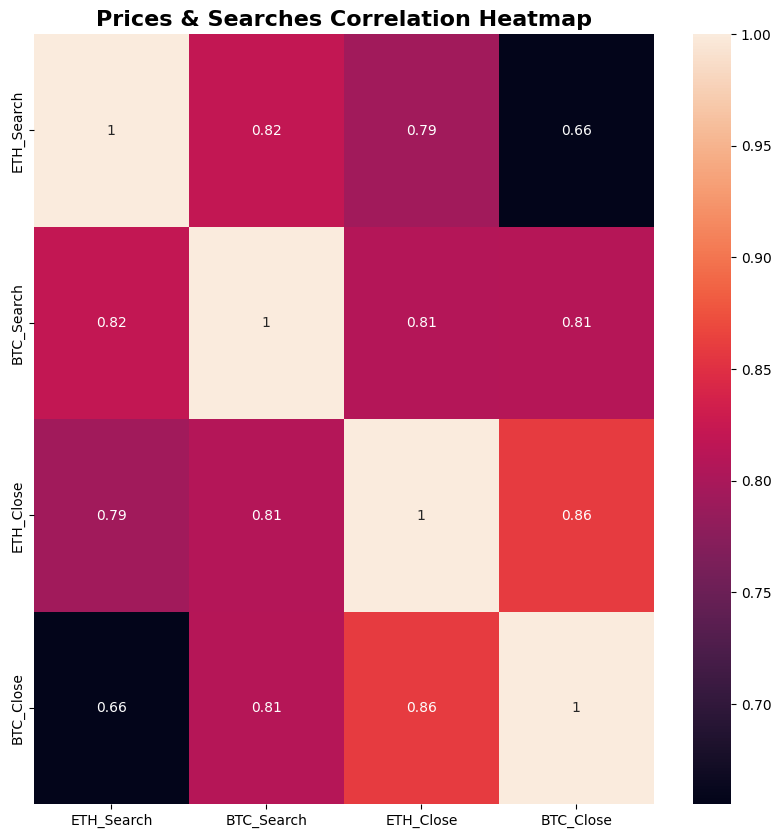

In [ ]:
#plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df[['ETH_Search','BTC_Search','ETH_Close','BTC_Close']].corr(),annot=True)
plt.title('Prices & Searches Correlation Heatmap', fontsize=16, fontweight='bold')



The chart displays a correlation heatmap showing the relationships between the search interest (Search) and closing prices (Close) for Ethereum (ETH) and Bitcoin (BTC). Overall, the results indicate strong positive correlations among all four variables. The strong correlations include those within a cryptocurrency, such as ETH Search and ETH Close (0.79) and BTC Search and BTC Close (0.81), suggesting that higher search interest is associated with higher prices. Furthermore, there are high positive cross-asset correlations like ETH Close and BTC Close (0.86) and ETH Search and BTC Search (0.82), indicating the two cryptocurrencies tend to move together both in price and search interest.

In [ ]:
date={
    'Date':['2018-01-01 00:00:00+00:00','2019-01-01 00:00:00+00:00','2021-05-01 00:00:00+00:00',
            '2021-11-01 00:00:00+00:00','2022-12-01 00:00:00+00:00','2024-12-01 00:00:00+00:00','2024-03-01 00:00:00+00:00','2024-09-01 00:00:00+00:00']
}
date=pd.DataFrame(date)
date['Date']=pd.to_datetime(date['Date'],utc=True).dt.normalize()


In [ ]:
df

,timestamp,Searches in Billion,ETH_Search,BTC_Search,BNB,ETH_Close,BTC_Close
0,2015-08-01 00:00:00+00:00,155.5,0.7775,4.665,0.000,1.259649,281.601013
1,2015-09-01 00:00:00+00:00,158.0,0.7900,4.740,0.000,0.988966,228.121002
2,2015-10-01 00:00:00+00:00,160.5,0.8025,4.815,0.000,0.661104,237.548996
3,2015-11-01 00:00:00+00:00,163.0,0.8150,6.520,0.000,0.931352,325.431000
4,2015-12-01 00:00:00+00:00,165.5,0.8275,6.620,0.000,0.886259,362.488007
...,...,...,...,...,...,...,...
115,2025-03-01 00:00:00+00:00,680.5,13.6100,210.955,20.415,2016.081466,86031.912400
116,2025-04-01 00:00:00+00:00,688.0,13.7600,192.640,20.640,1686.593293,85169.169590
117,2025-05-01 00:00:00+00:00,695.5,13.9100,180.830,20.865,2378.676565,96492.339050
118,2025-06-01 00:00:00+00:00,703.0,14.0600,168.720,14.060,2514.773758,105652.098600


In [ ]:
def position(x):
  if x+1000 <4000:
    return x+1500
  else:
    return x-3000

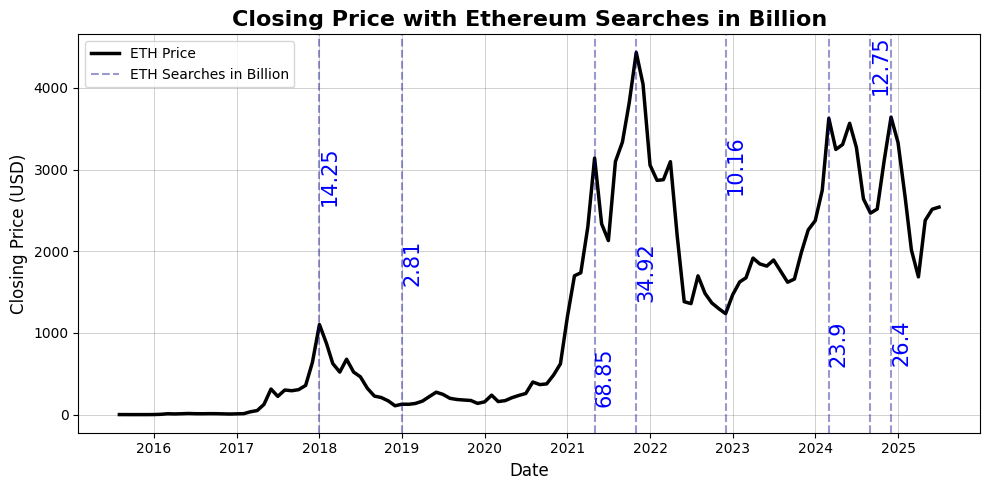

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'],df['ETH_Close'], color = "black", linewidth=2.5)

for d in date['Date']:
  plt.axvline(
        x=d,              # The X-axis position (the date)
        color='darkblue',         # Color of the line
        linestyle='--',      # Dashed line style
        linewidth=1.5,       # Thickness of the line
        alpha=0.4            # Transparency
    )
  plt.text(x=d,y=position(df[df['timestamp']==d]['ETH_Close'].values[0]),
           s=f'{df[df['timestamp']==d]['ETH_Search'].values[0]}',rotation=90, fontsize=15, color='blue' )
plt.title('Closing Price with Ethereum Searches in Billion', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend(['ETH Price','ETH Searches in Billion'])
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show()


This chart clearly shows the Ethereum (ETH) Closing Price (solid black line) over time, with major spikes in ETH Search Volume in Billions indicated by dashed blue lines. The key takeaway is the strong visual synchronization between the two variables: every major price peak or steep climb in the ETH closing price (notably in 2017/2018, 2021/2022, and 2024/2025) is immediately accompanied by or preceded by a significant spike in public search interest. The largest recorded search volumes (e.g., 68.85B and 34.92B) occur right at the market's most extreme points, demonstrating that peak euphoria or massive media attention correlates directly with the cryptocurrency's maximum valuations.

In [ ]:
def position(x):
  if x+10000 <100000:
    return x+25000
  else:
    return x-70000

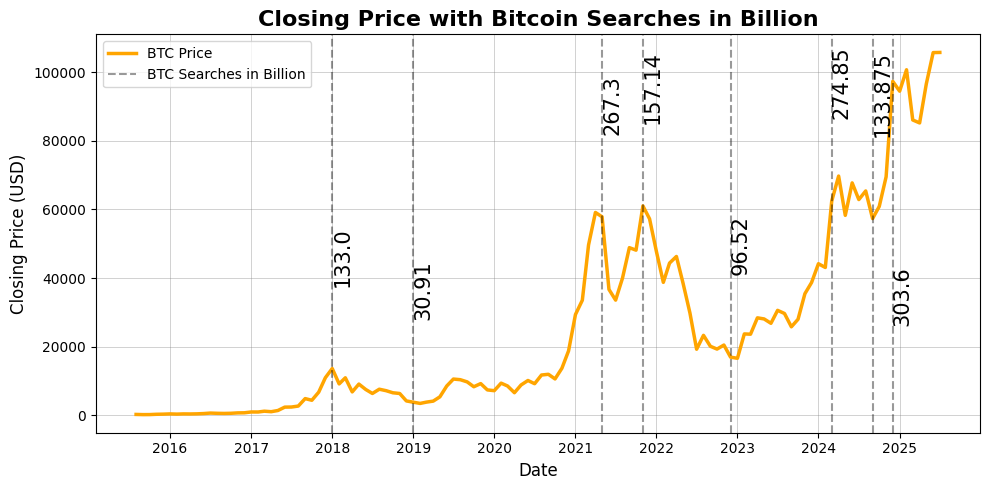

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'],df['BTC_Close'], color = "Orange", linewidth=2.5)
for d in date['Date']:
  plt.axvline(
        x=d,              # The X-axis position (the date)
        color='black',         # Color of the line
        linestyle='--',      # Dashed line style
        linewidth=1.5,       # Thickness of the line
        alpha=0.4            # Transparency
    )
  plt.text(x=d,y=position(df[df['timestamp']==d]['BTC_Close'].values[0]),
           s=f'{df[df['timestamp']==d]['BTC_Search'].values[0]}',rotation=90, fontsize=15, color='black' )
plt.title('Closing Price with Bitcoin Searches in Billion', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend(['BTC Price','BTC Searches in Billion'])
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show()

This chart displays the Bitcoin (BTC) Closing Price (thick orange line) over time, overlaid with major spikes in BTC Search Volume in Billions (vertical dashed gray lines with values). The chart clearly demonstrates a powerful positive correlation between price and public interest, a common feature of speculative assets. The largest spikes in search volume, such as $267.3$B and $274.85$B, occur precisely during the major market peaks (early 2021 and 2024), indicating that peak prices are directly associated with maximum public attention and euphoria. Notably, the search volumes are significantly higher than those observed for Ethereum, reflecting Bitcoin's generally larger market size and greater mainstream interest.

# **Final Interpretation**
The relationship between Bitcoin and Ethereum prices is best understood by looking at their different investor bases and how that affects the ETH/BTC ratio. Because they are highly correlated (they generally move together), Bitcoin's price is mostly a reflection of pure market enthusiasm or panic, acting as the default sentiment indicator for the entire crypto space, or 'digital gold'. Where they differ is in extreme moments. Investor sentiment drives deviations because Ethereum is valued for its utility and innovation—the underlying technology for Decentralized Finance (DeFi). When Ethereum has a major technical upgrade or when the DeFi sector booms, sentiment shifts, driving capital rotation from BTC into ETH. Therefore, while broad investor sentiment dictates the overall direction for both, the relative sentiment tied to technological advancement is what causes Ethereum to temporarily outperform Bitcoin.